<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My research aims to find the correlations between education and homelessness in counties within new jersey and in the process I stumbled on elevated rates of homelessness in counties  with a high density of universities and colleges in New Jersey. This prompts an inquiry into the underlying factors contributing to this phenomenon. One potential explanation is that areas with numerous educational institutions attract a diverse population, including students and low-income individuals, which may strain local housing resources and exacerbate affordability issues. Additionally, these regions often experience rising rental prices driven by demand for student housing, pushing vulnerable populations further into precarious living situations. Furthermore, the presence of educational institutions may indicate a concentration of social services and support systems, potentially attracting individuals facing homelessness in search of resources. This interplay between educational access and housing stability invites further exploration into the systemic issues that lead to both educational opportunities and homelessness within these urban environments. Understanding this relationship can inform policy interventions aimed at addressing the housing crisis while enhancing educational accessibility.

In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

### PS1


In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(0.5, 1.0, 'New Jersey Counties')

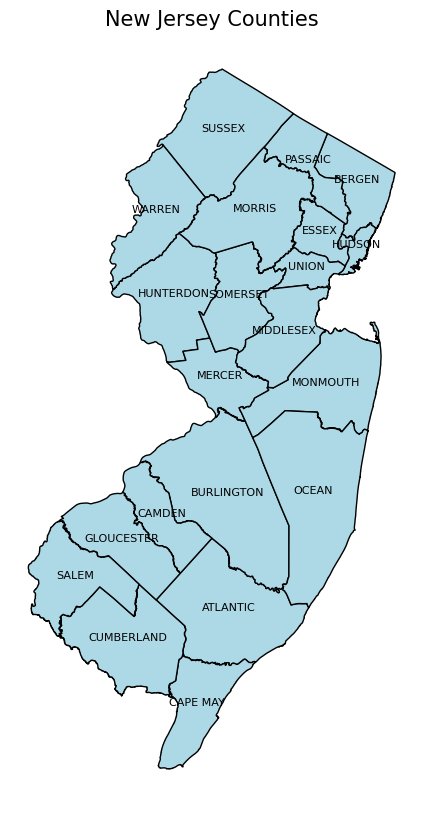

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the counties with light blue color and black edges
njC0.plot(ax=ax, color='lightblue', edgecolor='black')

# Label each county with its name
for idx, row in njC0.iterrows():
    # Use the centroid of each county geometry to place the text
    centroid = row['geometry'].centroid
    # Add the county name as a label at the centroid
    ax.text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Add a title
ax.set_title('New Jersey Counties', fontsize=15)

# Remove axis for a cleaner look
ax.set_axis_off()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

Text(0.5, 1.0, 'Percentage Values of Poverty by County in New Jersey')

Text(-74.69083932840073, 41.13930667421804, 'Sussex')

Text(-74.95975435337706, 39.80353923771176, 'Camden')

Text(-74.308221619638, 40.65993108893368, 'Union')

Text(-74.84997701373725, 39.08509810864436, 'Cape May')

Text(-74.668067407223, 39.87771729625139, 'Burlington')

Text(-74.40885975983326, 40.44006428814184, 'Middlesex')

Text(-74.07617761704523, 40.73075415654247, 'Hudson')

Text(-74.15936096025231, 40.286159288526136, 'Monmouth')

Text(-74.61633661726256, 40.56350693995562, 'Somerset')

Text(-74.24991593187701, 39.865932496053674, 'Ocean')

Text(-75.14141304419304, 39.717264599632315, 'Gloucester')

Text(-75.12931826873744, 39.32809858070772, 'Cumberland')

Text(-74.54451066896736, 40.86200422274507, 'Morris')

Text(-74.24706016240626, 40.787214788350276, 'Essex')

Text(-74.0742073165757, 40.95968887555052, 'Bergen')

Text(-74.99734985061639, 40.85714852605964, 'Warren')

Text(-74.30077565935196, 41.0343059973849, 'Passaic')

Text(-75.35798569038714, 39.57677517137154, 'Salem')

Text(-74.91224776511804, 40.56729689928183, 'Hunterdon')

Text(-74.63373043156672, 39.468829511216406, 'Atlantic')

Text(-74.70175239198414, 40.283437425281825, 'Mercer')

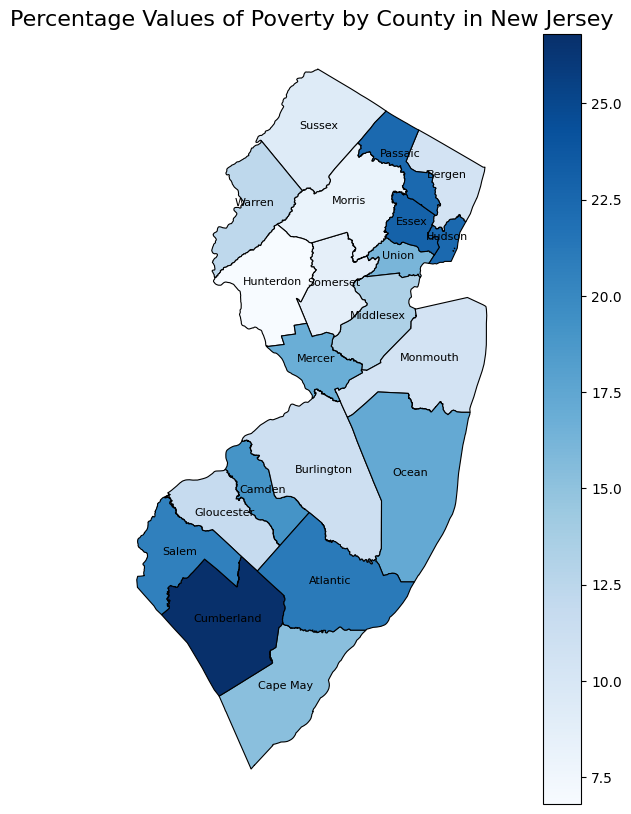

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Data for percentage values by county
data = {
    'County': ['Cumberland County', 'Essex County', 'Hudson County', 'Passaic County', 'Atlantic County',
               'Salem County', 'Camden County', 'Ocean County', 'Mercer County', 'Union County',
               'Cape May County', 'Middlesex County', 'Warren County', 'Gloucester County',
               'Burlington County', 'Bergen County', 'Monmouth County', 'Sussex County',
               'Somerset County', 'Morris County', 'Hunterdon County'],
    'Value (Percent)': [26.8, 22.9, 22.4, 22.4, 21.1, 20.7, 19.1, 17.2, 16.8, 16.1,
                        15.3, 13.3, 12.3, 11.8, 11.1, 10.5, 10.5, 9.3, 8.6, 8.1, 6.8]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Load the shapefile of New Jersey counties
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)

# Filter for counties in New Jersey
nj_counties = counties[counties['STATEFP'] == '34']  # 34 is the FIPS code for New Jersey

# Further standardize and correct any issues manually
df['County'] = df['County'].str.replace("County", "").str.strip()
nj_counties['NAME'] = nj_counties['NAME'].str.replace("County", "").str.strip()

# Merge the percentage data with the shapefile data
nj_counties = nj_counties.merge(df, how='left', left_on='NAME', right_on='County')

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the counties and shade based on percentage values
nj_counties.plot(ax=ax, column='Value (Percent)', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)

# Add a title
ax.set_title('Percentage Values of Poverty by County in New Jersey', fontsize=16)

# Remove axis
ax.set_axis_off()

# Add county names as labels on the map
for idx, row in nj_counties.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['NAME'], fontsize=8, ha='center', color='black')

# Show the plot
plt.show()


In [ ]:
Chronicity=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/chronic.xlsx')
Chronicity.dtypes
Chronicity.head(3)

,0
County,object
population,int64


,County,population
0,Atlantic,214
1,Bergen,51
2,Burlington,3


In [ ]:
# Rename the 'County' column to 'COUNTY' in the Chronicity DataFrame
Chronicity.rename(columns={'County': 'COUNTY'}, inplace=True)

# Convert the contents of the 'COUNTY' column to uppercase
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.upper()

# Check the updated DataFrame
print(Chronicity.head())

         COUNTY  population
0    ATLANTIC           214
1      BERGEN            51
2  BURLINGTON             3
3       CAMDEN         1888
4      CAPE MAY           4


In [ ]:
njC0['COUNTY'] = njC0['COUNTY'].str.strip().str.lower()
Chronicity['COUNTY'] = Chronicity['COUNTY'].str.strip().str.lower()

In [ ]:


# Merge njC0 with Chronicity on 'COUNTY'
njMerged = njC0.merge(Chronicity, on='COUNTY', how='left')


Text(446845.6710119825, 234718.67854471222, 'atlantic')

Text(608674.9722903798, 775344.9010704905, 'bergen')

Text(445015.10017129, 380378.9908087645, 'burlington')

Text(362977.140254135, 353705.812773536, 'camden')

Text(407013.1101691078, 114992.23820242906, 'cape may')

Text(319542.7506195572, 197359.46040186452, 'cumberland')

Text(562253.4894992855, 711675.2449585614, 'essex')

Text(311851.0044582621, 322497.09146205307, 'gloucester')

Text(608428.8356149012, 694107.9908801537, 'hudson')

Text(377593.6983420124, 631791.0280015195, 'hunterdon')

Text(435852.78759398806, 528228.3056099586, 'mercer')

Text(569736.7056196635, 519774.2489392377, 'monmouth')

Text(553566.9451515801, 382793.6503082437, 'ocean')

Text(547142.4144700206, 801720.2266180195, 'passaic')

Text(253014.767951469, 275761.56707926694, 'salem')

Text(459788.98517990607, 630164.5125108969, 'somerset')

Text(439541.23874521523, 839964.6338105244, 'sussex')

Text(545391.2858900087, 665430.0582508749, 'union')

Text(354515.98946147866, 737506.369618912, 'warren')

Text(479789.7234039994, 738913.4075906109, 'morris')

Text(516625.77448488685, 584830.6357102671, 'middlesex')

[]

[]

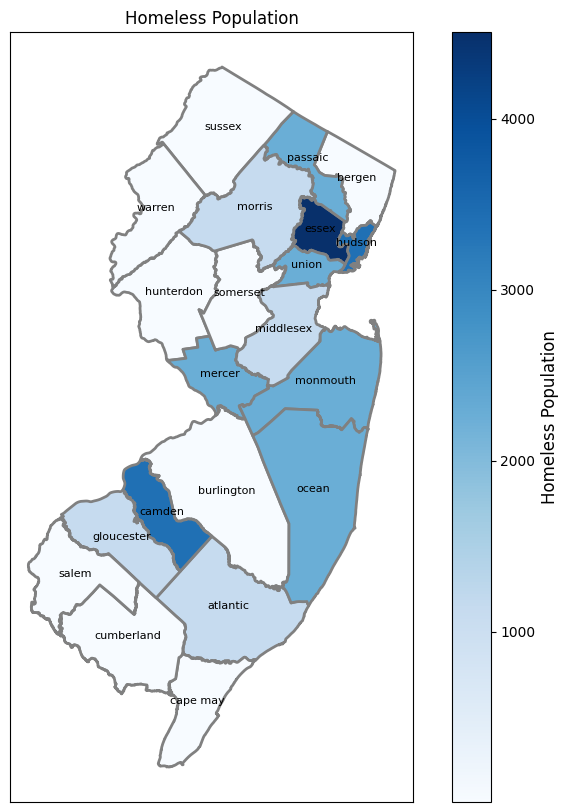

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot with specified colors (white to blue)
homeless_plot = njMerged.plot(ax=ax, column='population', cmap='Blues', scheme='natural_breaks', k=5,
                              edgecolor='grey', linewidth=2)

# Label each county with its name
for idx, row in njMerged.iterrows():
    # Use the centroid of each county geometry to place the text
    centroid = row['geometry'].centroid
    # Add the county name as a label at the centroid
    ax.text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Set the title of the plot
ax.title.set_text("Homeless Population")

# Remove x and y ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Create a color bar to show the gradient for population
norm = mpl.colors.Normalize(vmin=njMerged['population'].min(), vmax=njMerged['population'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# Add color bar to the right side of the plot
cbar.set_array([])  # This prevents a warning when setting up the color bar
cbar = fig.colorbar(cbar, ax=ax, orientation='vertical')
cbar.set_label('Homeless Population', fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Adjust tick label size

# Optional: Save the figure as a PDF
# plt.savefig('fig.pdf', bbox_inches='tight') # Uncomment this line to save the figure

# Show the plot
plt.show()

In [ ]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')


In [ ]:
col['enr'] = col.ENROLL.astype(float)

<Axes: >

<Axes: >

Text(446845.6710119825, 234718.67854471222, 'atlantic')

Text(608674.9722903798, 775344.9010704905, 'bergen')

Text(445015.10017129, 380378.9908087645, 'burlington')

Text(362977.140254135, 353705.812773536, 'camden')

Text(407013.1101691078, 114992.23820242906, 'cape may')

Text(319542.7506195572, 197359.46040186452, 'cumberland')

Text(562253.4894992855, 711675.2449585614, 'essex')

Text(311851.0044582621, 322497.09146205307, 'gloucester')

Text(608428.8356149012, 694107.9908801537, 'hudson')

Text(377593.6983420124, 631791.0280015195, 'hunterdon')

Text(435852.78759398806, 528228.3056099586, 'mercer')

Text(569736.7056196635, 519774.2489392377, 'monmouth')

Text(553566.9451515801, 382793.6503082437, 'ocean')

Text(547142.4144700206, 801720.2266180195, 'passaic')

Text(253014.767951469, 275761.56707926694, 'salem')

Text(459788.98517990607, 630164.5125108969, 'somerset')

Text(439541.23874521523, 839964.6338105244, 'sussex')

Text(545391.2858900087, 665430.0582508749, 'union')

Text(354515.98946147866, 737506.369618912, 'warren')

Text(479789.7234039994, 738913.4075906109, 'morris')

Text(516625.77448488685, 584830.6357102671, 'middlesex')

[]

[]

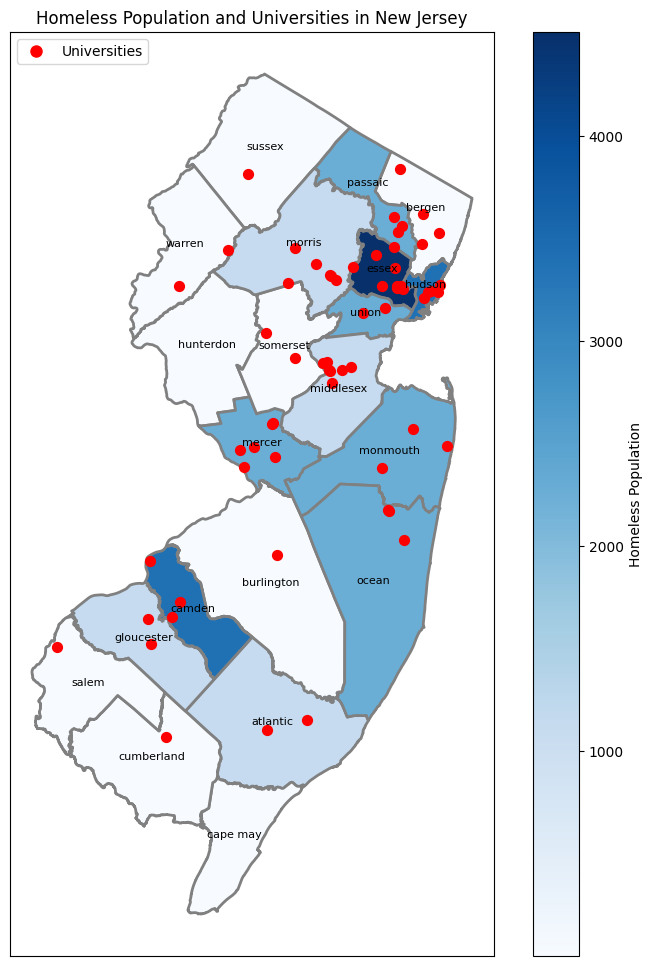

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl

# Plot homeless population and overlay universities
fig, ax = plt.subplots(1, figsize=(10, 12))

# Plot njMerged for homeless population, using a blue color scale
njMerged.plot(ax=ax, column='population', legend=False, cmap='Blues', scheme='natural_breaks', k=5,
              edgecolor='grey', linewidth=2)

# Overlay universities from the 'col' shapefile with red markers
col.plot(ax=ax, marker='o', color='red', markersize=50, legend=True, label='Universities')

# Label each county with its name in black
for idx, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['COUNTY'], fontsize=8, ha='center', color='black')

# Set the title for the map
ax.title.set_text("Homeless Population and Universities in New Jersey")

# Remove x and y axis ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Add a legend for the university markers manually
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Universities',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left')

# Create a colorbar for the homeless population data
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=njMerged['population'].min(), vmax=njMerged['population'].max()))
sm._A = []  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Homeless Population')

# Show the map
plt.show()


<Axes: >

Text(0.5, 1.0, 'Camden County Municipalities')

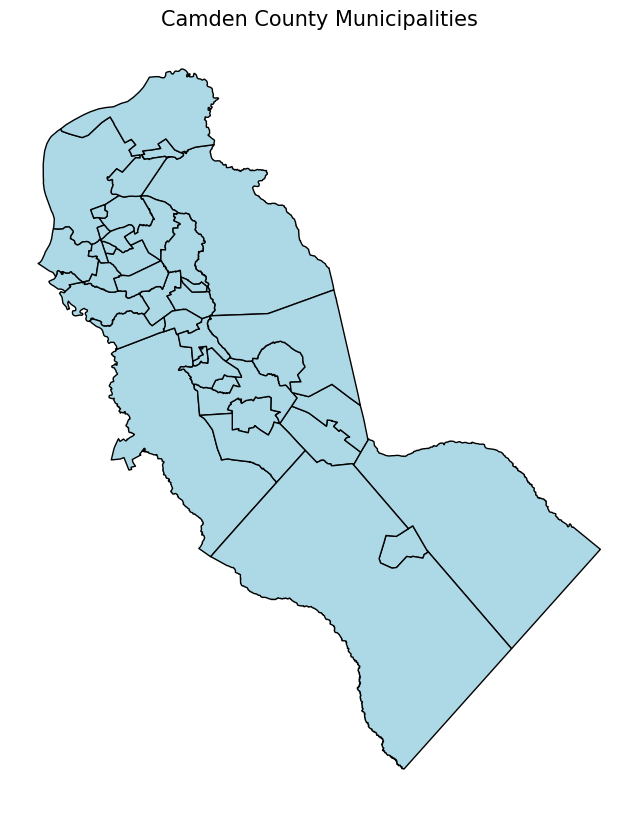

In [ ]:
! wget -q -O Municipality.zip https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip

zip_ref = zipfile.ZipFile('Municipality.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njMun=gpd.read_file('Municipalities.shp')

# Step 4: Plot the shapefile with black edges
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Create a figure and axis

# Plot with specified color and edgecolor
njMun.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title and remove axis for a cleaner look
ax.set_title('Camden County Municipalities', fontsize=15)
ax.set_axis_off()


# Show the plot
plt.show()

In [ ]:
col = gpd.read_file('Municipality.zip')
col.dtypes



,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [ ]:

njMun.dtypes #with geopandas can do stuff like with pandas :)
#njMun.info()

,0
FID,int32
COUSUBNS,object
GEOID,object
NAMELSAD,object
CLASSFP,object
FUNCSTAT,object
ALAND,int32
AWATER,int32
INTPTLAT,object
INTPTLON,object


In [ ]:
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

In [ ]:
MunPop=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')
#njMun1 = pd.merge(njMun, MunPop, on='Municipality',how='outer',indicator=True)
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

njMun1 = njMun.merge(MunPop, on='Municipality', how='left')

<Axes: >

[]

[]

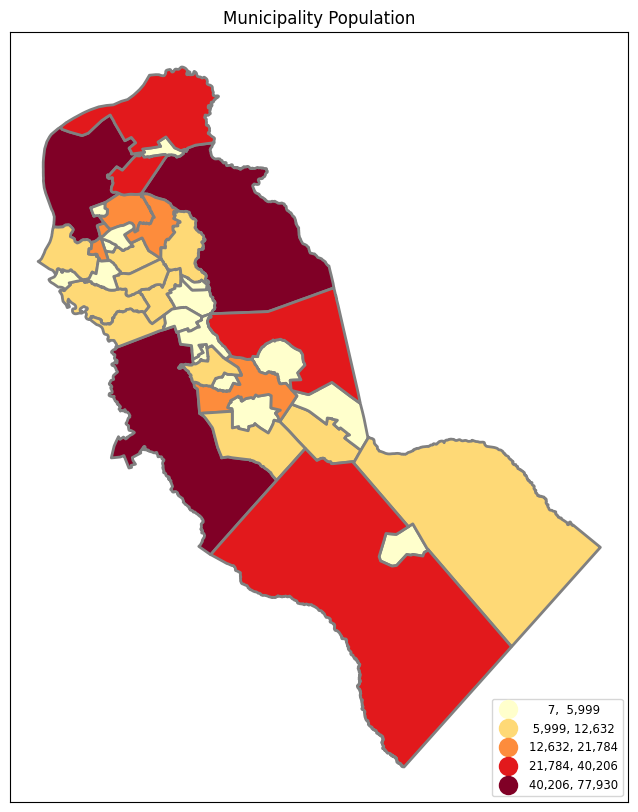

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
# Plot with specified color and edgecolor

njMun1.plot(ax=ax,column='population',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Municipality Population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
MunSch=pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')